In [22]:
# Dependencies
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import psycopg2
import sqlalchemy

In [23]:
county_csv = "2015_county_census_data_with_abbreviation.csv"

In [24]:
# Read our 2015 county data into pandas
county_df = pd.read_csv(county_csv)
county_df.head()

,ID,CensusId,State,State code,County,TotalPop,Men,Women,Hispanic,White,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1,1001,Alabama,AL,Autauga,55221,26745,28476,2.6,75.8,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,2,1003,Alabama,AL,Baldwin,195121,95314,99807,4.5,83.1,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,3,1005,Alabama,AL,Barbour,26932,14497,12435,4.6,46.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,4,1007,Alabama,AL,Bibb,22604,12073,10531,2.2,74.5,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,5,1009,Alabama,AL,Blount,57710,28512,29198,8.6,87.9,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [25]:
county_df.columns

Index(['ID', 'CensusId', 'State', 'State code', 'County', 'TotalPop', 'Men',
       'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific',
       'Citizen', 'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr',
       'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office',
       'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk',
       'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork',
       'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [26]:
crime_csv = "crime_data_w_population_and_cri.csv"

In [27]:
# Read our crime data into pandas
crime_df2 = pd.read_csv(crime_csv)
crime_df2.head()

,ID,County,State code,crime_rate_per_100000,index,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,...,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY
0,1,Yuba,CA,388.601036,538,1,4,245,73251,73251,...,27,39,213,612,1148,253,27,73340,6,115
1,2,Adams,CO,336.322153,724,1,4,247,457228,457686,...,274,238,1044,2175,9187,1464,101,469193,8,1
2,3,Alamosa,CO,178.428598,1630,1,4,248,15927,15927,...,3,3,22,52,226,15,3,16253,8,3
3,4,Arapahoe,CO,297.988700,889,1,4,249,637227,593040,...,265,552,970,2879,11787,1348,110,607070,8,5
4,5,Archuleta,CO,196.818107,1479,1,4,250,12179,12179,...,3,1,20,65,125,8,3,12194,8,7


In [28]:
crime_df2.columns

Index(['ID', 'County', 'State code', 'crime_rate_per_100000', 'index',
       'EDITION', 'PART', 'IDNO', 'CPOPARST', 'CPOPCRIM', 'AG_ARRST', 'AG_OFF',
       'COVIND', 'someINDEX', 'MODINDX', 'MURDER', 'RAPE', 'ROBBERY',
       'AGASSLT', 'BURGLRY', 'LARCENY', 'MVTHEFT', 'ARSON', 'population',
       'FIPS_ST', 'FIPS_CTY'],
      dtype='object')

In [29]:
#Merge the two dataframes
countycrime_df = pd.merge(county_df, crime_df2, on=["County", "State code"])
countycrime_df.head()

,ID_x,CensusId,State,State code,County,TotalPop,Men,Women,Hispanic,White,...,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY
0,1,1001,Alabama,AL,Autauga,55221,26745,28476,2.6,75.8,...,15,34,87,447,1233,85,108,55246,1,1
1,2,1003,Alabama,AL,Baldwin,195121,95314,99807,4.5,83.1,...,30,76,332,967,3829,192,31,195540,1,3
2,3,1005,Alabama,AL,Barbour,26932,14497,12435,4.6,46.2,...,4,8,36,90,362,21,0,27076,1,5
3,4,1007,Alabama,AL,Bibb,22604,12073,10531,2.2,74.5,...,4,8,36,122,251,27,0,22512,1,7
4,5,1009,Alabama,AL,Blount,57710,28512,29198,8.6,87.9,...,11,9,101,397,865,86,9,57872,1,9


In [30]:
countycrime_df.columns

Index(['ID_x', 'CensusId', 'State', 'State code', 'County', 'TotalPop', 'Men',
       'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific',
       'Citizen', 'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr',
       'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office',
       'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk',
       'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork',
       'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment', 'ID_y',
       'crime_rate_per_100000', 'index', 'EDITION', 'PART', 'IDNO', 'CPOPARST',
       'CPOPCRIM', 'AG_ARRST', 'AG_OFF', 'COVIND', 'someINDEX', 'MODINDX',
       'MURDER', 'RAPE', 'ROBBERY', 'AGASSLT', 'BURGLRY', 'LARCENY', 'MVTHEFT',
       'ARSON', 'population', 'FIPS_ST', 'FIPS_CTY'],
      dtype='object')

In [31]:
#Clean the combined dataframe by dropping unneeded columns and renaming the df to summary_df.
summary_df = countycrime_df.drop(columns=['ID_x', 'index', 'EDITION', 'PART', 'IDNO', 'CPOPARST', 'CPOPCRIM', 'AG_ARRST', 'AG_OFF',
'COVIND', 'someINDEX', 'MODINDX', 'population', 'FIPS_ST','FIPS_CTY', 'IncomeErr', 'IncomePerCapErr'])
summary_df.head()

,CensusId,State,State code,County,TotalPop,Men,Women,Hispanic,White,Black,...,ID_y,crime_rate_per_100000,MURDER,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON
0,1001,Alabama,AL,Autauga,55221,26745,28476,2.6,75.8,18.5,...,2938,251.601926,3,15,34,87,447,1233,85,108
1,1003,Alabama,AL,Baldwin,195121,95314,99807,4.5,83.1,9.5,...,2939,228.086325,8,30,76,332,967,3829,192,31
2,1005,Alabama,AL,Barbour,26932,14497,12435,4.6,46.2,46.7,...,2940,177.278771,0,4,8,36,90,362,21,0
3,1007,Alabama,AL,Bibb,22604,12073,10531,2.2,74.5,21.4,...,2941,217.661692,1,4,8,36,122,251,27,0
4,1009,Alabama,AL,Blount,57710,28512,29198,8.6,87.9,1.5,...,2942,210.810064,1,11,9,101,397,865,86,9


In [32]:
summary_df.columns

Index(['CensusId', 'State', 'State code', 'County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'Income', 'IncomePerCap', 'Poverty', 'ChildPoverty', 'Professional',
       'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool',
       'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute',
       'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork',
       'Unemployment', 'ID_y', 'crime_rate_per_100000', 'MURDER', 'RAPE',
       'ROBBERY', 'AGASSLT', 'BURGLRY', 'LARCENY', 'MVTHEFT', 'ARSON'],
      dtype='object')

In [33]:
#export a csv file of the summary_df dataframe, to be used to upload the data to postgreSQL.
#summary_df.to_csv("Output/summary.csv", index=False, header=True)

In [34]:
#Create a pie chart showing total us crime for a select group of crime types. Each wedge to reflect a percentage for a crime types.
UStotalcrime_csv = "QRY005 - US Crime Breakdown for pie chart.csv"

In [35]:
UStotalcrime_df = pd.read_csv(UStotalcrime_csv)
UStotalcrime_df.head()

,murder,rape,robbery,aggrevated_assault,burglery,larceny,auto_theft,arson
0,14691,82551,352633,748321,2071767,6031504,713535,52577


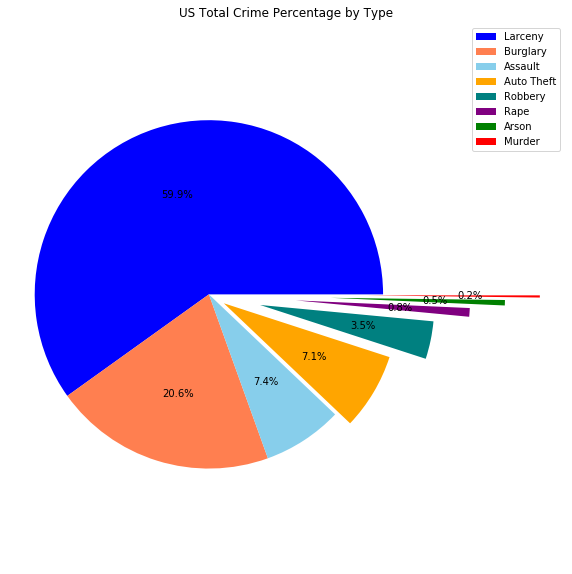

<Figure size 432x288 with 0 Axes>

In [36]:
labels = ["Larceny", "Burglary", "Assault", "Auto Theft", "Robbery", "Rape", "Arson", "Murder"]
sizes = [59.9, 20.6, 7.4, 7.1, 3.5, 0.8, 0.5, 0.2]
colors = ["blue", "coral", "skyblue", "orange", "teal", "purple", "green", "red"]
explode = (0, 0, 0,0.1,0.3,0.5,0.7,0.9)
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
plt.pie(sizes, explode=explode, colors=colors, autopct="%1.1f%%")
plt.title("US Total Crime Percentage by Type")
plt.legend(labels=labels,loc="best")
plt.axis("tight")
plt.axis("equal")
plt.show()
plt.draw()
fig.savefig('Images/us_total_crime_percentages.png', dpi=100)

In [37]:
#Create a scatterplot reflecting US income and crime rate by county.
incomecrime_csv = "QRY001 - Income vs Crime Rate per 100000.csv"

In [38]:
incomecrime_df = pd.read_csv(incomecrime_csv)
incomecrime_df.head()

,code,county,totalpop,income,incomepercap,crime_rate_per_100000
0,Alabama,Autauga,55221,51281.0,24974,251.601926
1,Alabama,Baldwin,195121,50254.0,27317,228.086325
2,Alabama,Barbour,26932,32964.0,16824,177.278771
3,Alabama,Bibb,22604,38678.0,18431,217.661692
4,Alabama,Blount,57710,45813.0,20532,210.810064


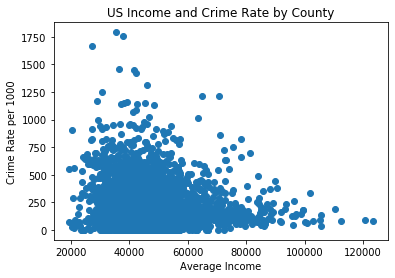

<Figure size 432x288 with 0 Axes>

In [39]:
plt.scatter(x=incomecrime_df['income'], y=incomecrime_df['crime_rate_per_100000'], marker='o')
plt.title("US Income and Crime Rate by County")
plt.xlabel("Average Income")
plt.ylabel("Crime Rate per 1000")
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('Images/us_income_crimerate_bycounty.png', dpi=100)

In [40]:
#Create a line graph reflecting the US poverty rate and US crime rate by state averages.
povertycrime_csv = "QRY002 - Poverty vs Crime.csv"

In [41]:
povertycrime_df = pd.read_csv(povertycrime_csv)
povertycrime_df

,state_code,crime_per_100k,poverty
0,NE,61.626394,11.975269
1,ND,94.477058,11.424528
2,KY,98.717896,21.827500
3,SD,100.916841,16.181538
4,ME,115.957182,15.100000
5,VT,119.252844,11.785714
6,MN,134.415779,11.672414
7,OH,138.136987,15.334091
8,IN,139.118947,13.890217
9,WI,142.599517,12.519444


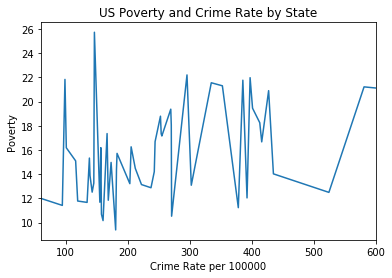

<Figure size 432x288 with 0 Axes>

In [42]:
plt.plot(povertycrime_df['crime_per_100k'],povertycrime_df['poverty'])
#plt.plot(x=povertycrime_df['Poverty'], y=povertycrime_df['Crime per 100k'])
plt.title("US Poverty and Crime Rate by State")
plt.xlabel("Crime Rate per 100000")
plt.ylabel("Poverty")
#plt.locator_params(axis='x', nbins=10)
#plt.set_xlim(60,1220)
#plt.set_ylim(9, 26)
plt.xlim(60, 600)
#plt.ylim(9,26)
#plt.savefig("../Images/povertycrime.png")
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('Images/us_povertyrate_crimerate_bystate.png', dpi=100)